## Trabajo Práctico 3 - Minería de Datos
Año 2023 TUIA
## Integrantes
- Enzo Ferrari
- Micaela Mailen Pozzo

## Descripción
El trabajo consiste en la aplicación de los conocimientos adquiridos en las unidades 5 y 6 de la materia.\
Dataset:
- CoffeeRatings.csv

## Primera parte: Análisis de datos
Primero, debemos analizar los conjuntos de datos

##Ejercicio 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab as pl
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import preprocessing

import pandas as pd
ruta_del_archivo = '/content/CoffeeRatings.csv'
# Lee el archivo CSV con punto y coma como delimitador
df = pd.read_csv(ruta_del_archivo, delimiter=';')


# Dataset: CoffeeRatings


## Descripción
Este dataset consiste en registros de granos de café, calificados según sabor, aroma, entre otros. Además, cada grano tiene una variable categórica que es el color.


### VARIABLES:
- Scores_Aroma:      (Aroma) \
- Scores_Flavor:     (Sabor) \
- Scores_Aftertaste: (Regusto) \
- Scores_Acidity:    (Acidez) \
- Scores_Body:       (Cuerpo) \
- Scores_Balance:    (Equilibrio) \
- Scores_Uniformity: (Uniformidad) \
- Scores_Sweetness:  (Dulzura) \
- Scores_Moisture:   (Humedad) \
- Scores_Total:      (Total) \
- Color

In [ ]:
df

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green
...,...,...,...,...,...,...,...,...,...,...,...
830,758,70,675,692,70,692,100,100,11,7917,Green
831,758,767,742,742,767,767,867,867,1,7908,Green
832,0,0,0,0,0,0,0,0,12,0,Green
833,767,775,783,767,792,783,100,792,1,825,Bluish-Green


In [ ]:
#lectura de tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       835 non-null    int64 
 1   Scores_Flavor      835 non-null    int64 
 2   Scores_Aftertaste  835 non-null    int64 
 3   Scores_Acidity     835 non-null    int64 
 4   Scores_Body        835 non-null    int64 
 5   Scores_Balance     835 non-null    int64 
 6   Scores_Uniformity  835 non-null    int64 
 7   Scores_Sweetness   835 non-null    int64 
 8   Scores_Moisture    835 non-null    int64 
 9   Scores_Total       835 non-null    int64 
 10  Color              835 non-null    object
dtypes: int64(10), object(1)
memory usage: 71.9+ KB


In [ ]:
# Muestra las primeras filas del DataFrame
df.head()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green


In [ ]:
# Genera estadísticas descriptivas del DataFrame
df.describe()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,623.726946,615.576048,611.677844,617.116168,610.330539,611.276647,191.758084,157.644311,8.231138,6675.440719
std,273.720152,274.245606,263.865747,274.480062,276.366482,276.300203,257.583828,203.439529,5.130245,3007.519639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,717.000000,708.000000,683.000000,717.000000,708.000000,692.000000,100.000000,100.000000,1.000000,7792.000000
50%,758.000000,742.000000,733.000000,742.000000,742.000000,742.000000,100.000000,100.000000,11.000000,8183.000000
75%,775.000000,767.000000,758.000000,767.000000,767.000000,767.000000,100.000000,100.000000,12.000000,8325.000000
max,875.000000,883.000000,867.000000,875.000000,842.000000,858.000000,933.000000,933.000000,17.000000,9058.000000


No hay valores faltantes, el rango entre cada score ronda alrededor de 0 y 900, excepto moisture que ronda entre 0 y 17, y el total, que ronda entre 0 y 9000



In [ ]:
# Itera sobre todas las columnas y muestrra los valores únicos
for columna in df.columns:
    valores_unicos = df[columna].value_counts()
    print(f"Valores únicos en la columna '{columna}':\n{valores_unicos}\n")

Valores únicos en la columna 'Scores_Aroma':
767    123
75     105
758    103
742     79
775     77
783     68
733     64
80      37
725     35
792     30
717     24
70      17
708     15
817     11
808      9
692      7
842      7
683      4
833      4
85       3
825      2
65       2
675      1
858      1
867      1
875      1
633      1
667      1
508      1
781      1
0        1
Name: Scores_Aroma, dtype: int64

Valores únicos en la columna 'Scores_Flavor':
75     114
758     98
767     90
742     81
733     81
775     78
783     55
725     34
717     31
792     29
80      26
708     26
70      20
692     12
817     10
808      9
683      6
65       5
658      5
85       3
667      3
825      3
842      2
617      2
675      2
633      2
858      2
833      1
608      1
883      1
867      1
788      1
0        1
Name: Scores_Flavor, dtype: int64

Valores únicos en la columna 'Scores_Aftertaste':
733    107
75     100
742     90
758     85
767     64
725     60
717     55
775     4

# Análisis de frecuencia


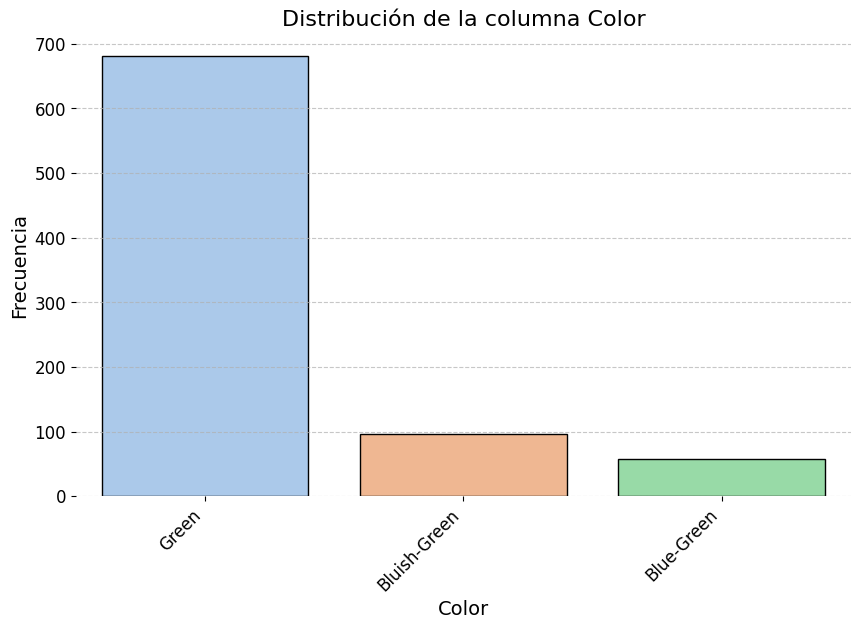

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Configuración de colores
colores = sns.color_palette("pastel")
sns.set_palette(colores)

# Graficar la distribución de la columna 'Color'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Color', palette=colores, edgecolor='black', order=df['Color'].value_counts().index)
plt.title('Distribución de la columna Color', fontsize=16)
plt.xlabel('Color', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotar etiquetas para mejor visibilidad
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)  # Eliminar bordes no deseados
plt.show()


Notamos un fuerte desbalanceo entre los colores. Solución propuesta: oversamplear la clase con menos registros por 3.

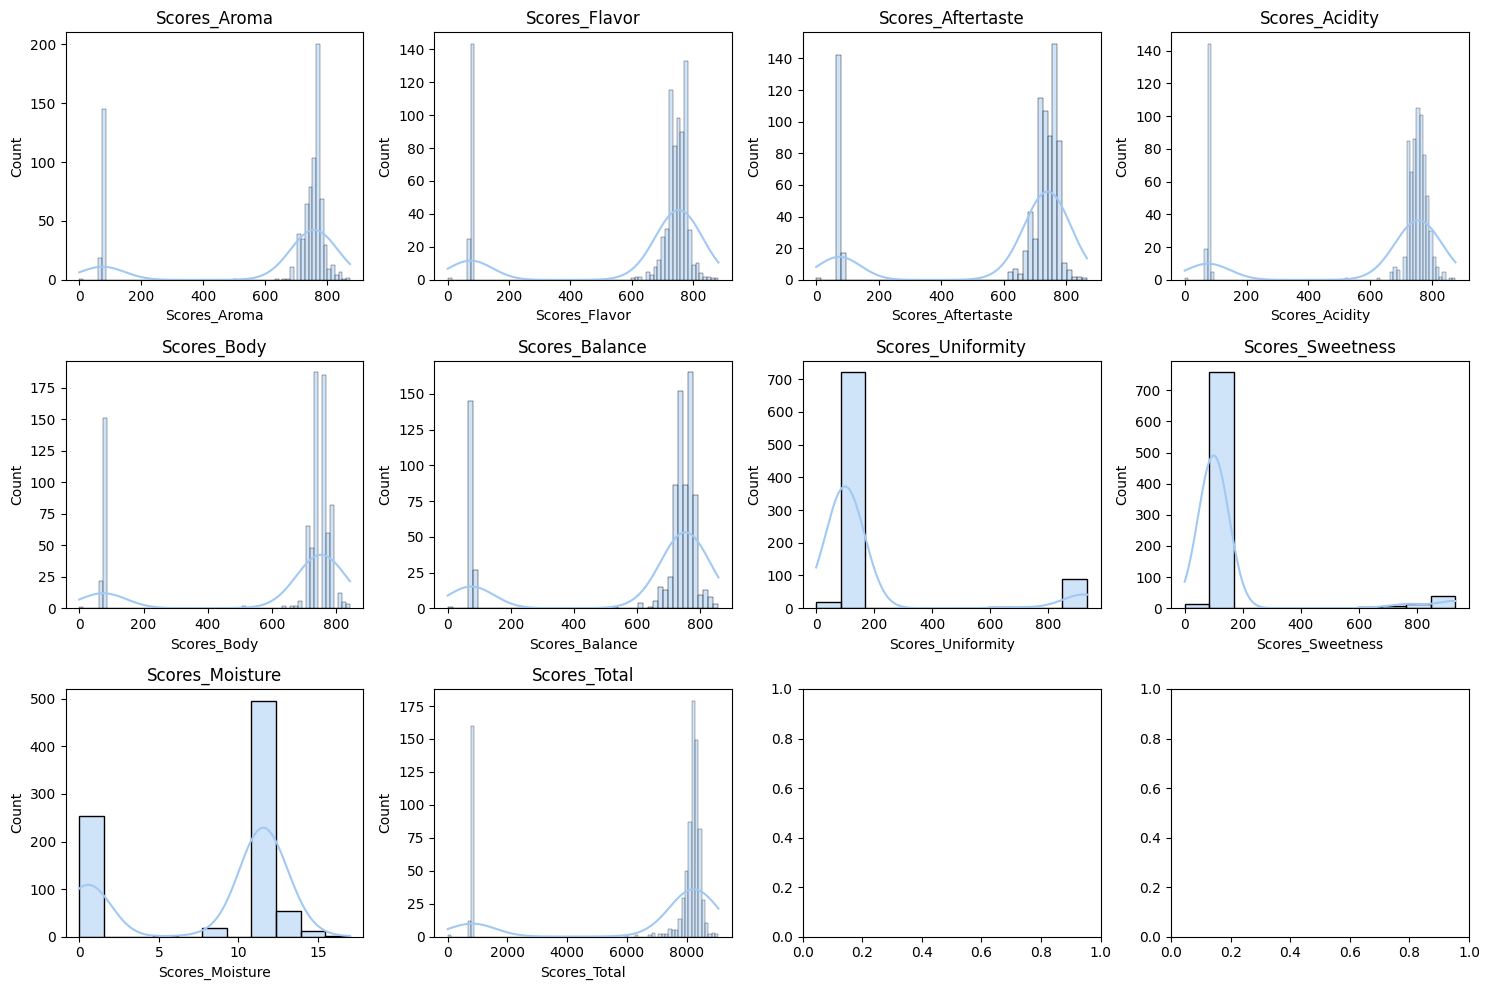

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Crear subplots para mostrar distribuciones de todas las columnas numéricas
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

columnas_numericas = ['Scores_Aroma', 'Scores_Flavor', 'Scores_Aftertaste', 'Scores_Acidity',
                      'Scores_Body', 'Scores_Balance', 'Scores_Uniformity', 'Scores_Sweetness',
                      'Scores_Moisture', 'Scores_Total']

for i, columna in enumerate(columnas_numericas):
    sns.histplot(df[columna], kde=True, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(columna)

plt.tight_layout()
plt.show()


La distribución de los datos en las variables continuas es bimodal en casi todas las variables. Hay que tener en cuenta esto al momento de estandarizar y tratar outliers
# Análisis de correlación

<ipython-input-16-852ba82a0acd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df.corr()


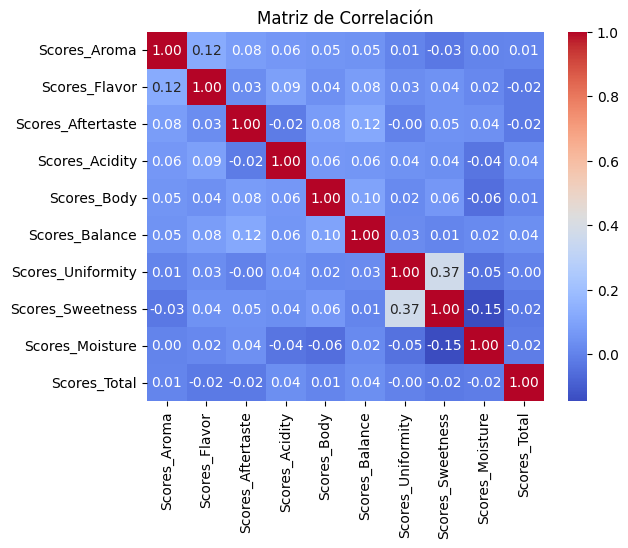

In [ ]:
# Calcular la matriz de correlación entre las columnas numéricas del DataFrame
correlacion = df.corr()
# Crear un mapa de calor utilizando seaborn para visualizar la matriz de correlación
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
# Agregar un título al mapa de calor
plt.title('Matriz de Correlación')
plt.show()


Como podemos observar, la correlación entre las variables es casi cero en casi todos los pares.Las que más correlación tienen son Uniformidad y Dulzura, teniendo muy poca igualmente. Para evitar saltar a conclusiones prematuras, veamos antes el pairplot entre variables numéricas.

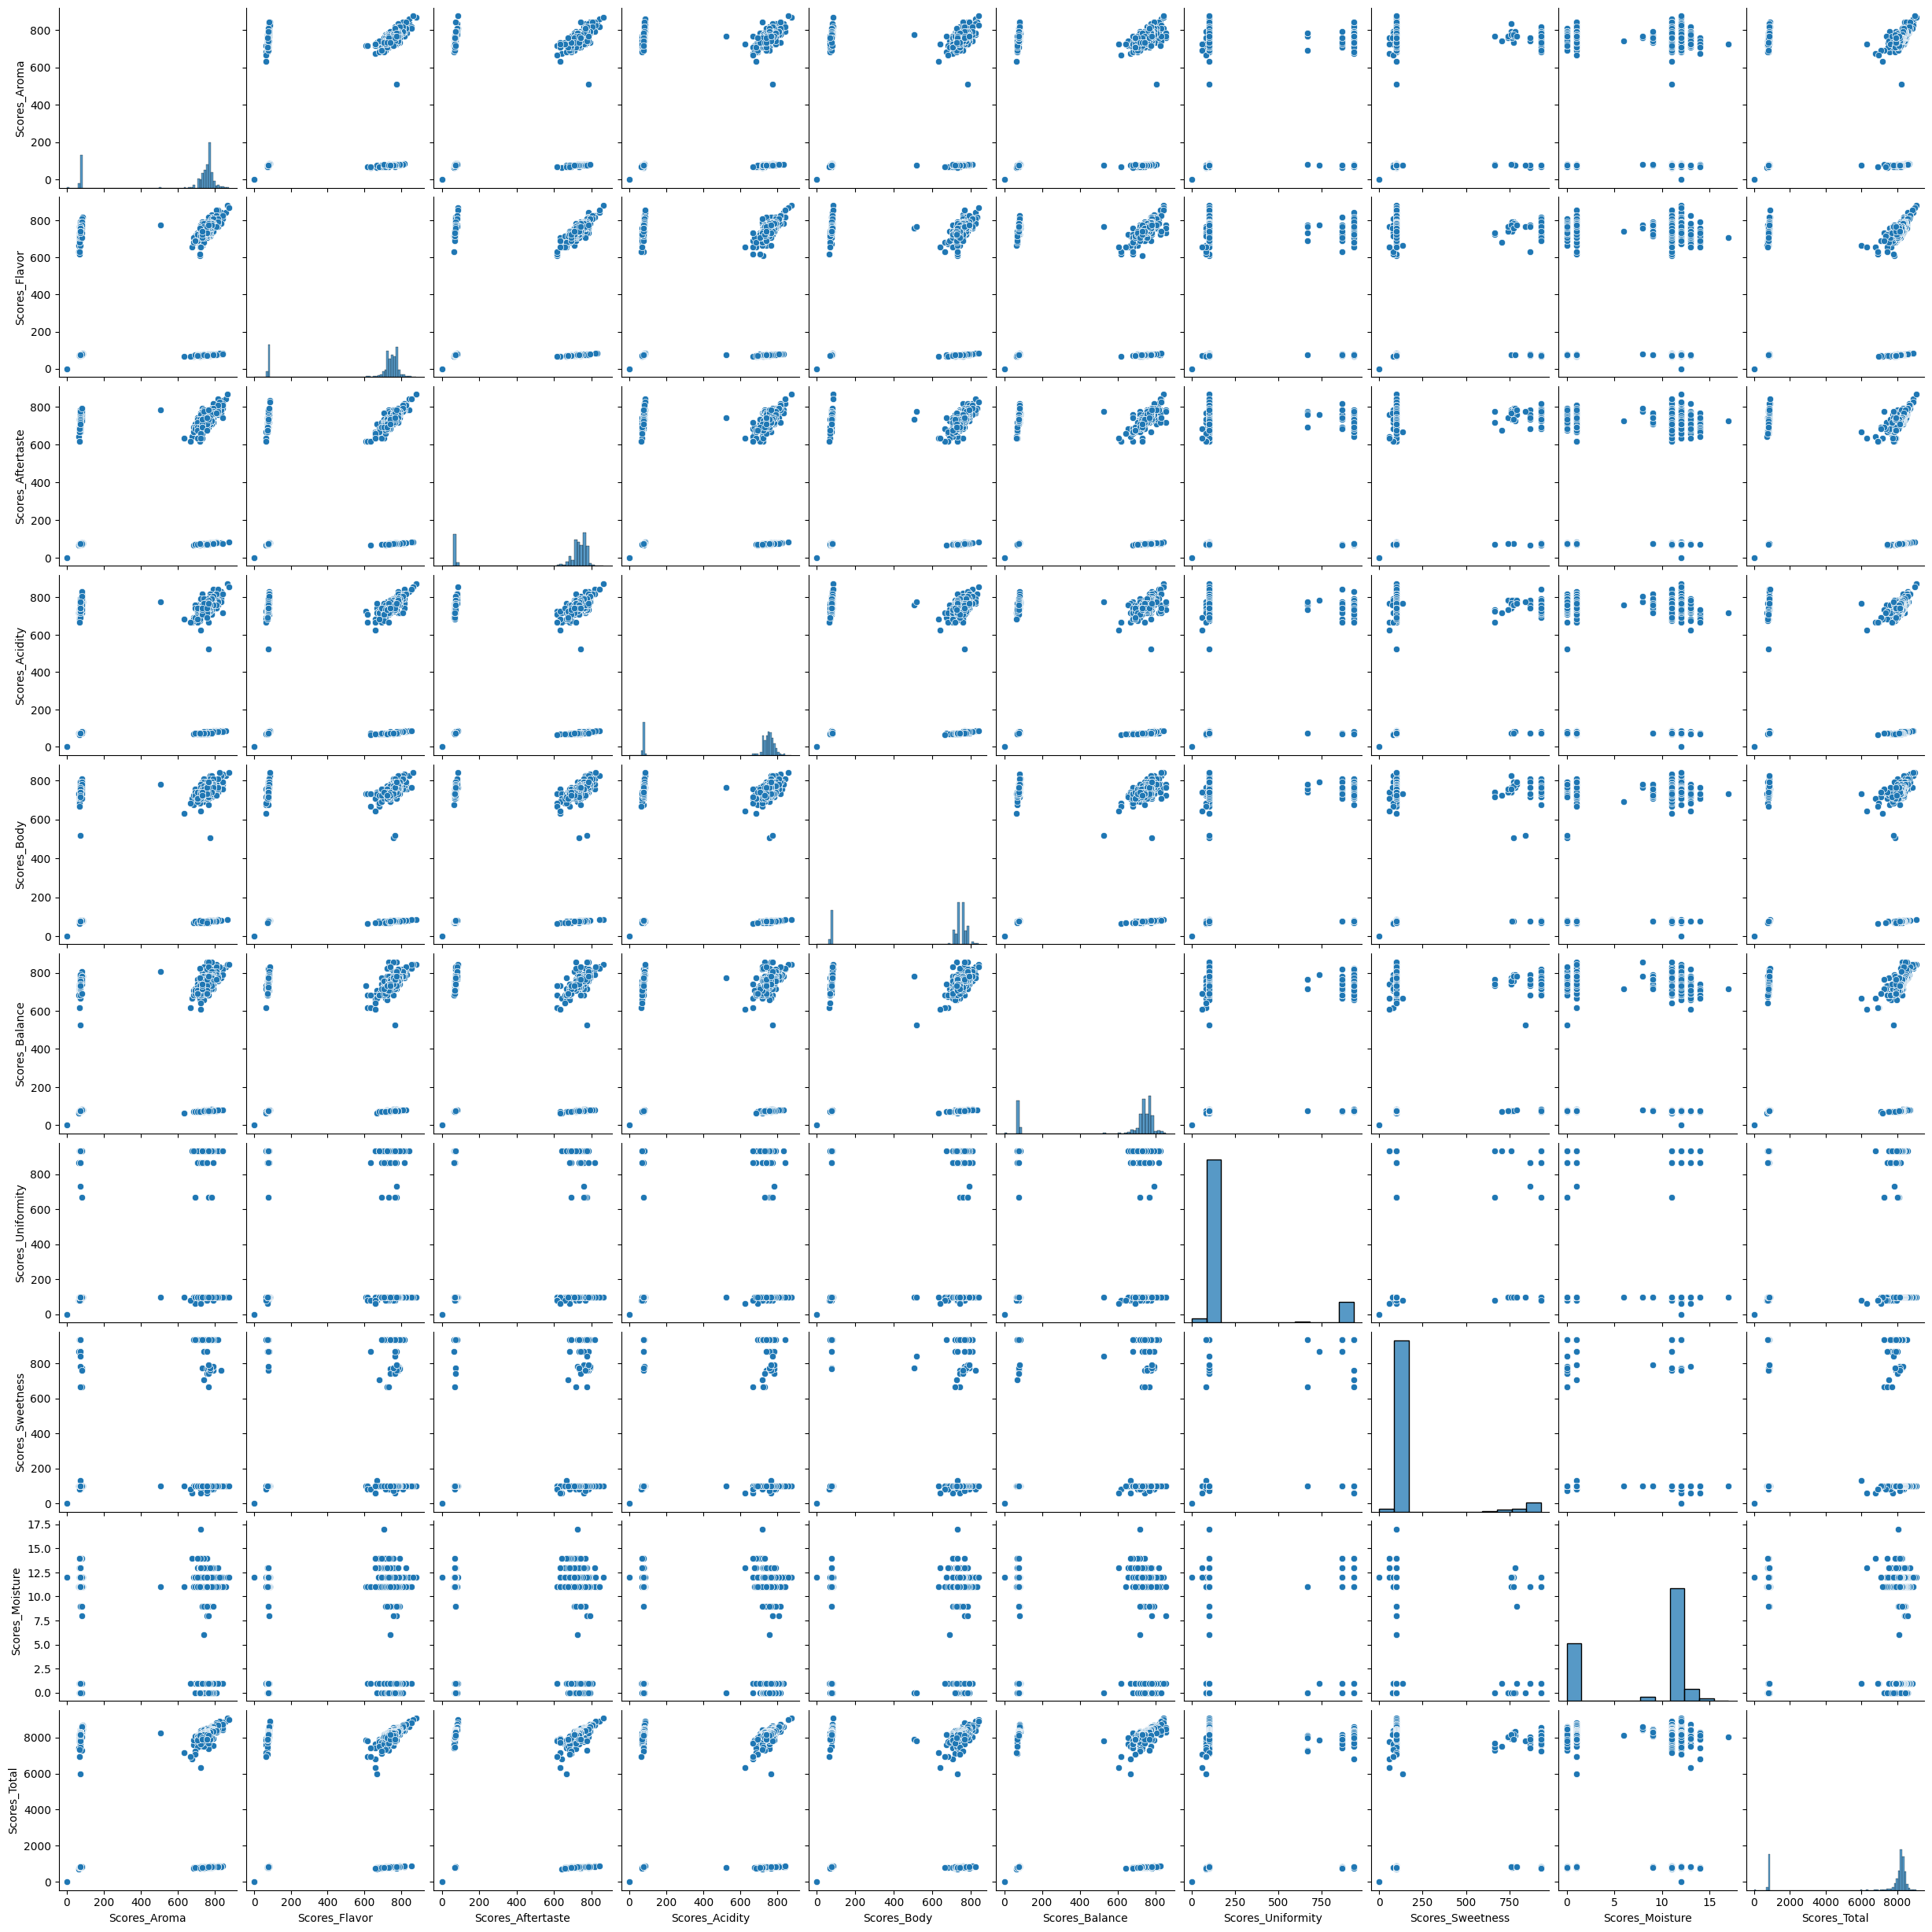

In [ ]:
# Crear un pairplot  para visualizar relaciones entre variables numéricas
sns.pairplot(df)

Como vemos, a pesar de que se tiene correlación cercana a cero, podemos observar en los paiplot que ningún par de variables es independiente, en todos se presencian los mismos tipos de clusters. Concluimos que las variables NO SON INDEPENDIENTES.

Visualizemos las variables numéricas respecto a los colores

<Figure size 800x800 with 0 Axes>

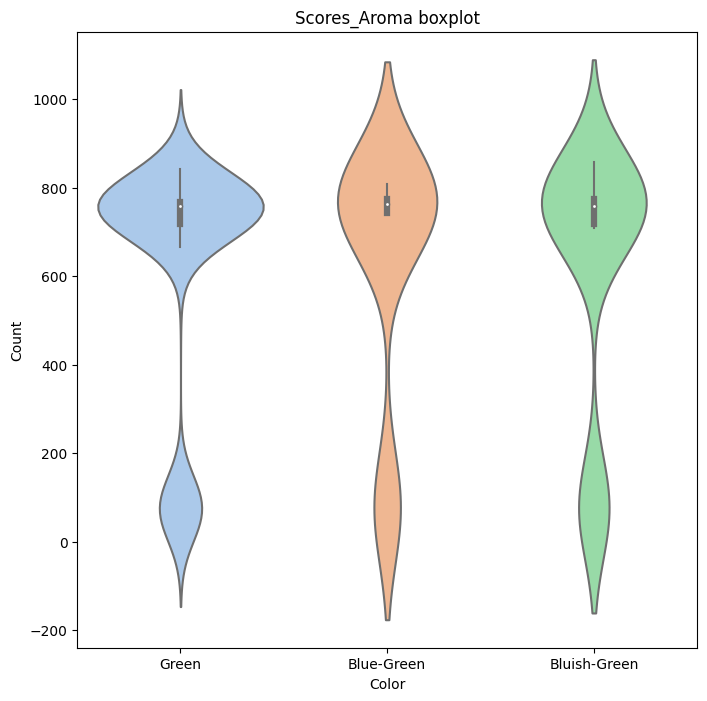

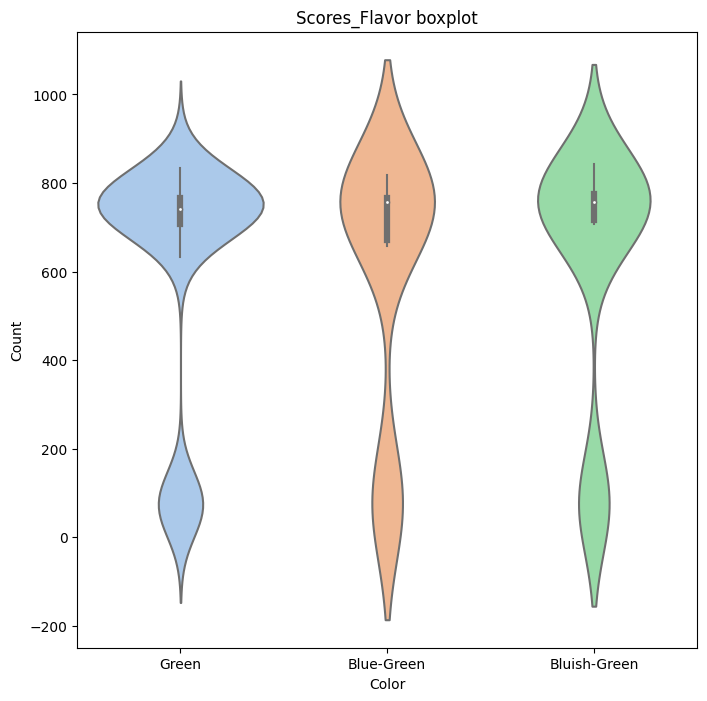

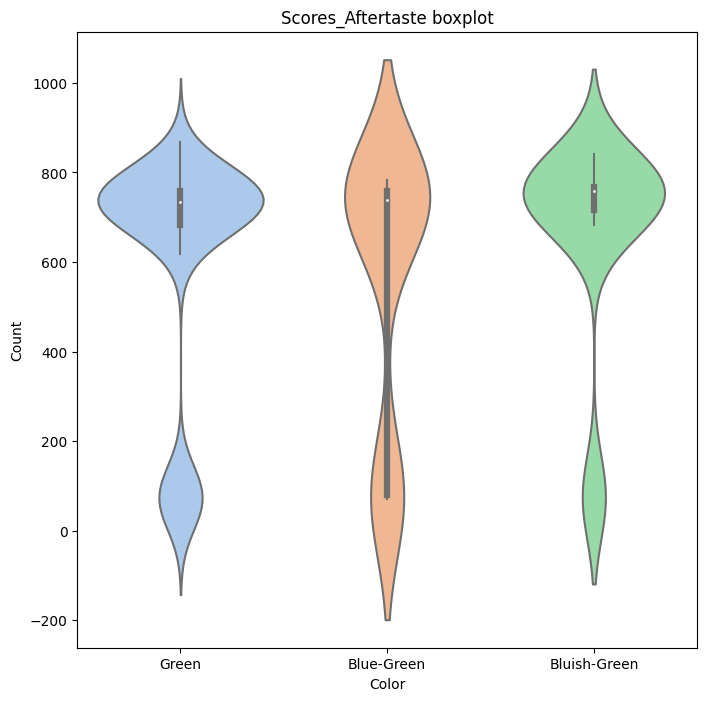

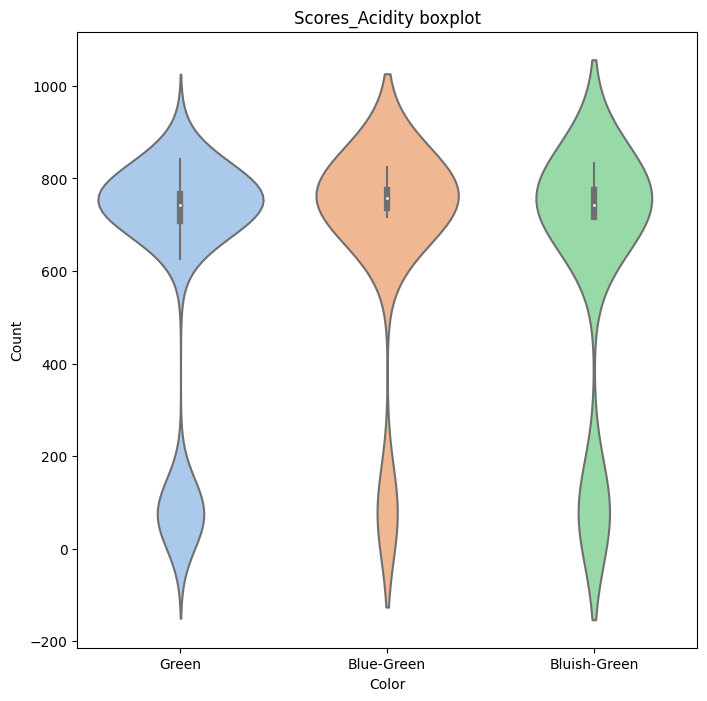

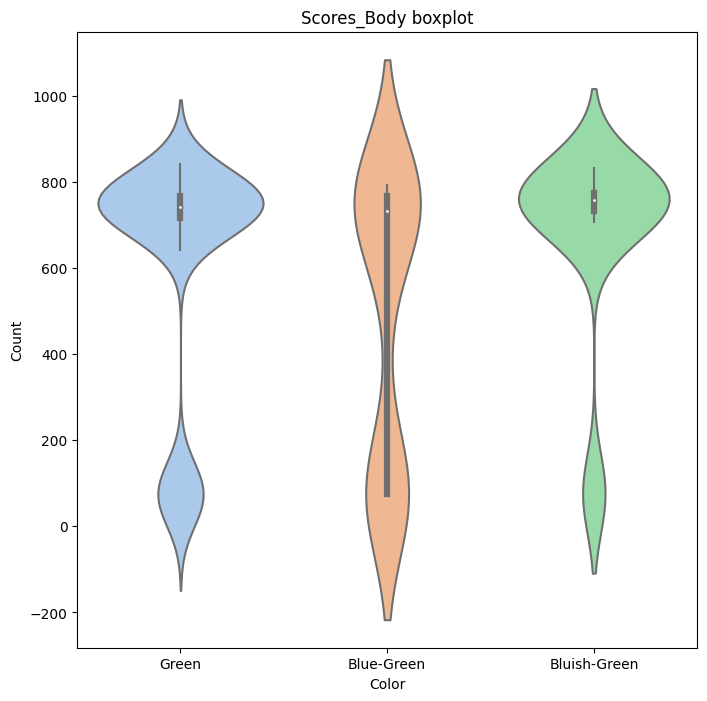

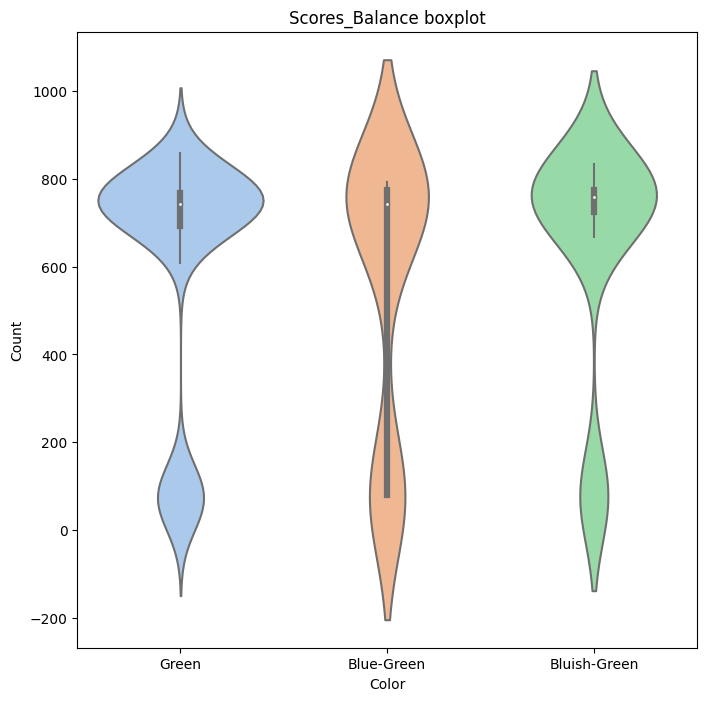

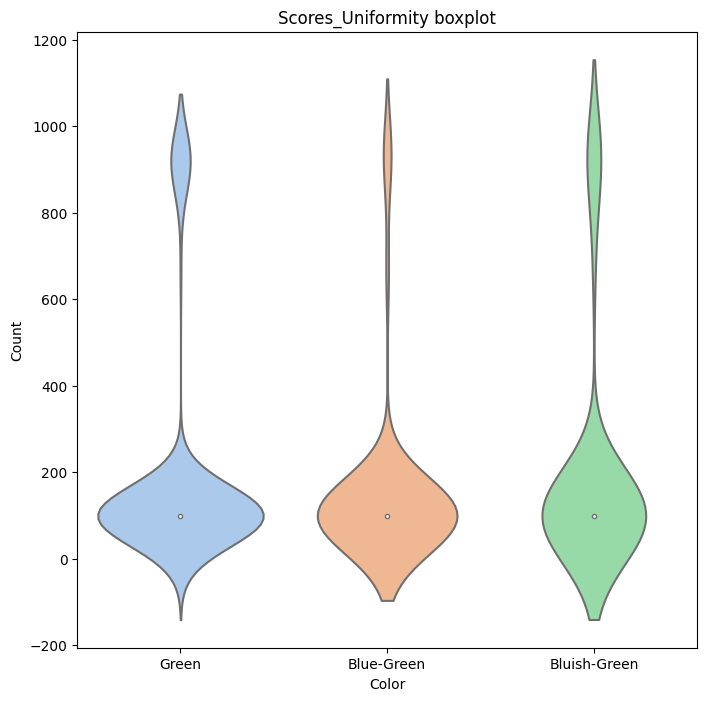

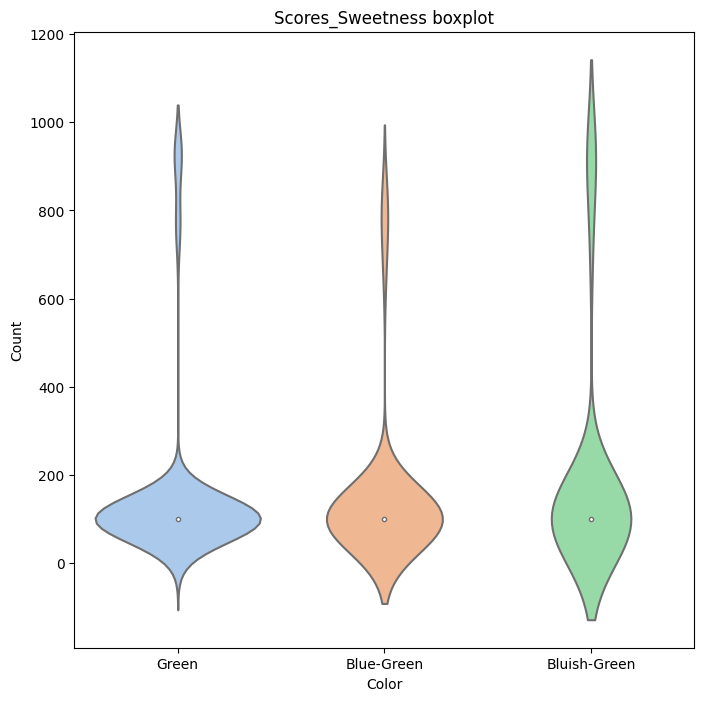

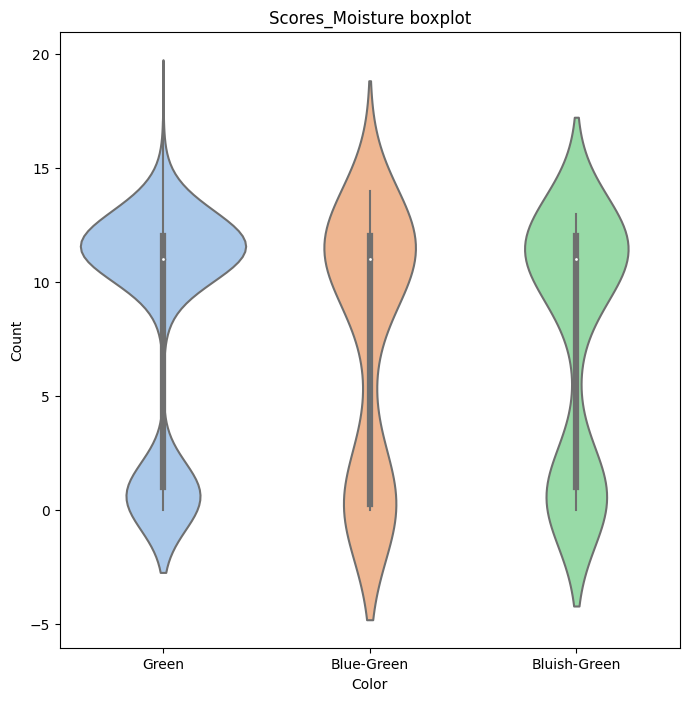

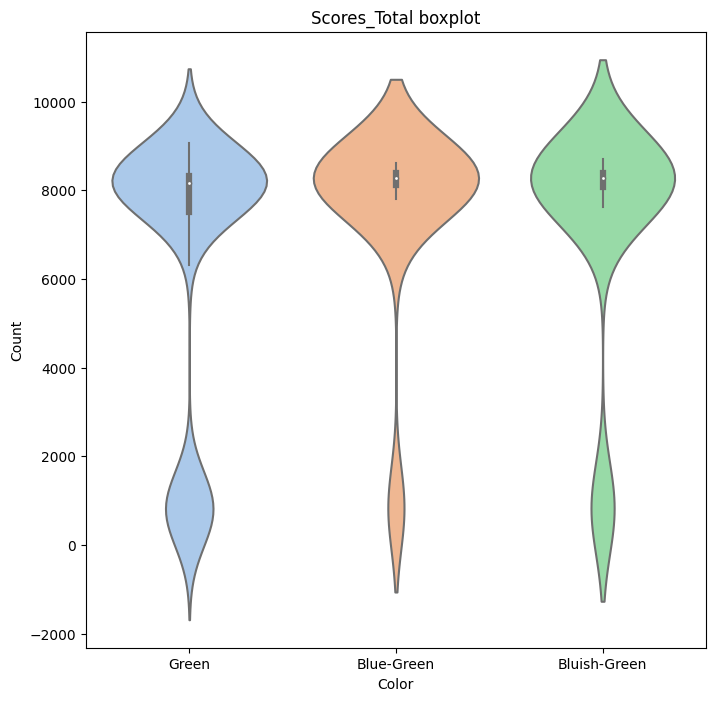

In [ ]:
numerical = ['Scores_Aroma', 'Scores_Flavor', 'Scores_Aftertaste', 'Scores_Acidity',
       'Scores_Body', 'Scores_Balance', 'Scores_Uniformity',
       'Scores_Sweetness', 'Scores_Moisture', 'Scores_Total']

# Visualizar boxplots según localidad
colores = sns.color_palette("pastel")
sns.set_palette(colores)
plt.figure(figsize=(8,8))
x_size = 10
y_size = 5
for n_col, column in enumerate(numerical):
  fig, axes = plt.subplots(figsize=(8,8))
  sns.violinplot(x='Color', y=column, data=df, ax=axes)
  plt.ylabel('Count')
  plt.title(f'{column} boxplot')
  plt.show()

Vemos que la distribución de las variables no varía según color.

## Outliers
Al ser las distribuciones bimodales, se descarta el tratamiento de outliers
## Estandarización
Como las variables son bimodales, usar z-score no es lo más adecuado. Decidimos usar estandarización min-max.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df.copy()

# min-max scaling
min_max_scaler = MinMaxScaler()
df_scaled[numerical] = min_max_scaler.fit_transform(df[numerical])

df_scaled

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,0.097143,0.096263,0.092272,0.091429,0.095012,0.093240,0.107181,0.107181,0.705882,0.959594,Green
1,0.097143,0.925255,0.092272,0.885714,0.095012,0.093240,0.107181,0.107181,0.705882,0.954074,Green
2,0.952000,0.090600,0.092272,0.091429,0.920428,0.093240,0.107181,0.107181,0.647059,0.950320,Blue-Green
3,0.091429,0.090600,0.092272,0.876571,0.920428,0.093240,0.107181,0.107181,0.647059,0.943034,Blue-Green
4,0.091429,0.896942,0.893887,0.885714,0.095012,0.903263,0.107181,0.107181,0.647059,0.937514,Green
...,...,...,...,...,...,...,...,...,...,...,...
830,0.866286,0.079275,0.778547,0.790857,0.083135,0.806527,0.107181,0.107181,0.647059,0.874034,Green
831,0.866286,0.868630,0.855825,0.848000,0.910926,0.893939,0.929260,0.929260,0.058824,0.873040,Green
832,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.705882,0.000000,Green
833,0.876571,0.877690,0.903114,0.876571,0.940618,0.912587,0.107181,0.848875,0.058824,0.091080,Bluish-Green


Como vimos, el dataset tiene un desbalance muy profundo. Para solucionar esto, primero probemos SVM sobre el dataset sin balancear y luego, contemplemos alternativas para solucionar el error


#Ejercicio 2

# SVM
SVM es un modelo de clasificación que consiste en la clasificación mediante un  hiperplano que además cuenta con cierto margen. Tiene como parámetro principal el costo, y además tiene la opción de funciones de kernel. Los kernels nos permiter hacer "doblados" sobre los conjuntos de datos para lograr un hiperparámetro distinto al plano en el caso de 3 dimensiones o la recta en el de 2 dimensiones, para así poder determinar hiperplanos más complejos.

Primero utilizaremos el kernel lineal
## Kernel: lineal

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
# Separar X e y
X = df_scaled[numerical]
y = df_scaled['Color']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    #y,
                                                                y.values.reshape(-1,1),
                                                                train_size = 0.7,
                                                                random_state = 42 ,
                                                                shuffle = True)

# Definición del Modelo
svm_classifier_linear = SVC(kernel='linear', C=1)

# Entrenamiento
svm_classifier_linear.fit(X_train, y_train)

# Predicciones
y_pred = svm_classifier_linear.predict(X_test)

# Evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, auc

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00        16
Bluish-Green       0.00      0.00      0.00        29
       Green       0.82      1.00      0.90       206

    accuracy                           0.82       251
   macro avg       0.27      0.33      0.30       251
weighted avg       0.67      0.82      0.74       251



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precisio

Notamos que las clases minoritarias no tienen métricas, veamos la matriz de confusión

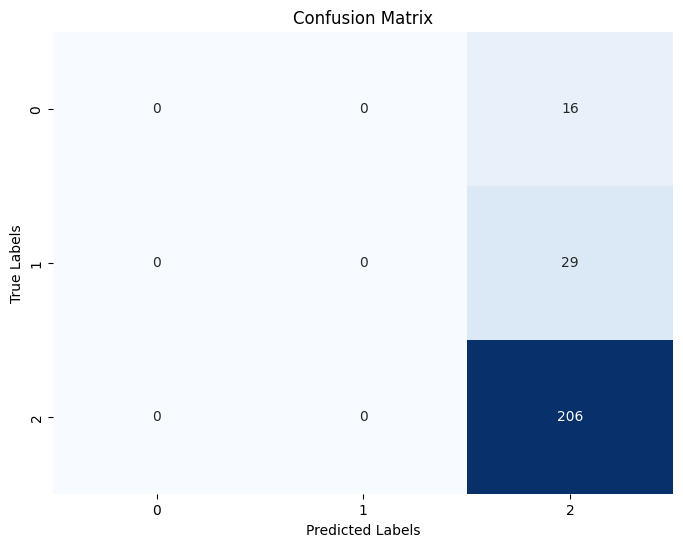

In [ ]:
# matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

En efecto, SVM también tiene problemas con el balanceo de clases, aquí vemos como overfittea sobre la clase mayoritaria. Para solucionar esto, debemos realizar undersampling sobre la clase mayoritaria, ya que el desbalance es muy grande.

## Undersampleo


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy={'Green':100})
# Separar X e y
X = df_scaled[numerical]
y = df_scaled['Color']
X_resized, y_resized = under_sampler.fit_resample(X,y)
undersampled_df = pd.DataFrame(X_resized)
undersampled_df['Color'] = y_resized

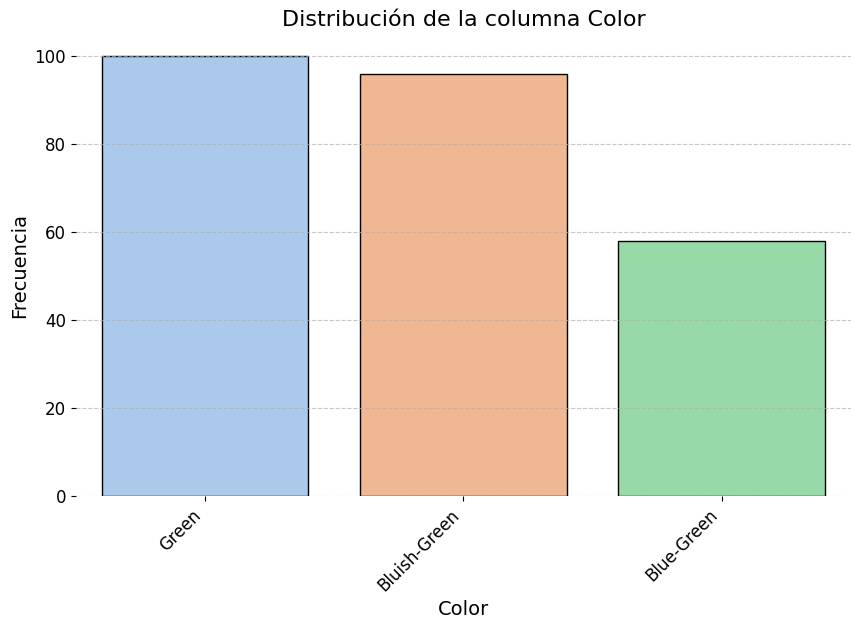

In [ ]:
# Configuración de colores
colores = sns.color_palette("pastel")
sns.set_palette(colores)

# Graficar la distribución de la columna 'Color' con estilo
plt.figure(figsize=(10, 6))
sns.countplot(data=undersampled_df, x='Color', palette=colores, edgecolor='black', order=df['Color'].value_counts().index)
plt.title('Distribución de la columna Color', fontsize=16)
plt.xlabel('Color', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotar etiquetas para mejor visibilidad
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)  # Eliminar bordes no deseados
plt.show()

In [ ]:
count_color = undersampled_df.groupby('Color')['Color'].count()
count_color

Color
Blue-Green       58
Bluish-Green     96
Green           100
Name: Color, dtype: int64

Además de hacer undersampling, determinamos pesos a las clases en el entrenamiento del modelo. Como solucionamos el problema de balanceo, de paso definamos el mejor costo con grid search y usemos validación cruzada. Como score elegimos f1_score, ya que tiene en cuenta múltiples métricas como precisión y recall. El f1-score es global, tiene en cuenta el f1 de todas las clases.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, make_scorer, precision_recall_fscore_support
import numpy as np
# Separar X e y
X = undersampled_df[numerical]
y = undersampled_df['Color']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    #            y.values.reshape(-1,1),
                                                                train_size = 0.7,
                                                                random_state = 42 ,
                                                                shuffle = True)
# Define the parameter grid
param_grid = {'C': [ 0.01, 0.1, 1, 5, 10, 15, 30, 50]}


# Definición del Modelo con los pesos adecuados
svm_classifier_linear = SVC(kernel='linear',class_weight={'Blue-Green': 1.724, "Bluish-Green": 1.041, "Green": 1.0})

# Create a scorer for precision and recall
scorer = make_scorer(f1_score, average='weighted')

# GridSearchCV for cross-validation
grid_search = GridSearchCV(estimator=svm_classifier_linear, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_svm_classifier = grid_search.best_estimator_

# Predictions on the test set
y_pred_linear = best_svm_classifier.predict(X_test)

# Mejor costo encontrado
print(f"Mejor C value: {grid_search.best_params_['C']}")
print("Resultados sobre el mejor costo")
# Evaluación
print(classification_report(y_test, y_pred_linear))


Mejor C value: 1
Resultados sobre el mejor costo
              precision    recall  f1-score   support

  Blue-Green       0.32      0.64      0.43        14
Bluish-Green       0.44      0.50      0.47        32
       Green       0.46      0.19      0.27        31

    accuracy                           0.40        77
   macro avg       0.41      0.45      0.39        77
weighted avg       0.43      0.40      0.38        77



Aquí podemos ver que el mejor costo que encontró grid search es de 15, lo que significa que un margen generoso produce mejores resultados en la clasificación. El análisis de métricas se hará al final.

# Validación cruzada
Analizemos las métricas bajo un sistema más robusto: cross validation. Para esto, spliteamos el dataset en 5 conjuntos e iteramos sobre cada uno eligiendolo como test. Elegimos como métrica objetivo el f1-score promediado.

In [ ]:
# Additional metrics for each fold
cv_predictions = cross_val_predict(best_svm_classifier, X_train, y_train, cv=5)
cv_metrics = precision_recall_fscore_support(y_train, cv_predictions, average='weighted')

# Cross-validation results for each fold
cross_val_f1 = cross_val_score(best_svm_classifier, X_train, y_train, cv=5, scoring=scorer)
print("Cross-Validation Results:")

for i, result in enumerate(cross_val_f1, 1):
    print(f"Fold {i}: {result * 100:.2f}%")

print("\nAverage Metrics Across Folds:")
print(f"Precision: {cv_metrics[0] * 100:.2f}%")
print(f"Recall: {cv_metrics[1] * 100:.2f}%")
print(f"F1 Score: {cv_metrics[2] * 100:.2f}%")


Cross-Validation Results:
Fold 1: 53.42%
Fold 2: 34.96%
Fold 3: 42.66%
Fold 4: 31.35%
Fold 5: 31.54%

Average Metrics Across Folds:
Precision: 41.99%
Recall: 40.68%
F1 Score: 40.33%


Como podemos observar, de por sí nuestro modelo no cuenta con buenas métricas. Además, contamos con una gran varianza entre los resultados de cada fold. Las razones de esto serán discutidas en la conclusión del trabajo.

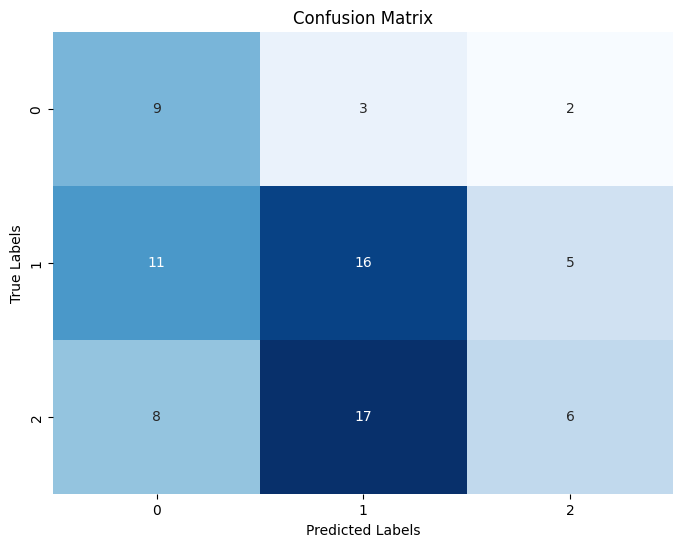

In [ ]:
# matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Vemos la matriz de confusión del mejor modelo con kernel lineal. Si bien la matriz tiene más sentido que lo que obtuvimos en un principio, existen otras alternativas.


#Ejercicio 3

# SVM
## Kernel: gaussiano
El procedimiento es el mismo que el anterior, la diferencia es que ahora utilizamos una función de kernel: la gaussiana. La idea es lograr doblar el espacio para poder determinar hiperplanos más complejos. De esta manera, tenemos la esperanza de que este hiperplano divida mejor las clases.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, accuracy_score, make_scorer, precision_recall_fscore_support
import numpy as np
# Separar X e y
X = undersampled_df[numerical]
y = undersampled_df['Color']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    #            y.values.reshape(-1,1),
                                                                train_size = 0.7,
                                                                random_state = 42 ,
                                                                shuffle = True)
# Define the parameter grid
param_grid = {'C': [ 0.01, 0.1, 1, 5, 10, 15, 30, 50],
              'gamma': ['scale', 'auto', 0.01, 0.25,0.4,0.5,0.6,0.8,1]}


# Definición del Modelo con los pesos adecuados
svm_classifier_gaussian = SVC(kernel='rbf',class_weight={'Blue-Green': 1.724, "Bluish-Green": 1.041, "Green": 1.0})

# Create a scorer for precision and recall
scorer = make_scorer(f1_score, average='weighted')

# GridSearchCV for cross-validation
grid_search = GridSearchCV(estimator=svm_classifier_gaussian, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_svm_classifier = grid_search.best_estimator_

# Predictions on the test set
y_pred_gaussian = best_svm_classifier.predict(X_test)

# Mejor costo encontrado
print(f"Mejor C value: {grid_search.best_params_['C']}")
print(f"Mejor gamma: {grid_search.best_params_['gamma']}")
print("Resultados sobre el mejor costo")
# Evaluación
print(classification_report(y_test, y_pred_gaussian))


Mejor C value: 50
Mejor gamma: 0.25
Resultados sobre el mejor costo
              precision    recall  f1-score   support

  Blue-Green       0.31      0.57      0.40        14
Bluish-Green       0.42      0.47      0.44        32
       Green       0.27      0.13      0.17        31

    accuracy                           0.35        77
   macro avg       0.33      0.39      0.34        77
weighted avg       0.34      0.35      0.33        77



Los resultados del modelo muestran un mejor rendimiento con un valor de C igual a 50 y un gamma de 0.25.

# Validación cruzada

In [ ]:
# Additional metrics for each fold
cv_predictions = cross_val_predict(best_svm_classifier, X_train, y_train, cv=5)
cv_metrics = precision_recall_fscore_support(y_train, cv_predictions, average='weighted')

# Cross-validation results for each fold
cross_val_f1 = cross_val_score(best_svm_classifier, X_train, y_train, cv=5, scoring=scorer)
print("Cross-Validation Results:")

for i, result in enumerate(cross_val_f1, 1):
    print(f"Fold {i}: {result * 100:.2f}%")

print("\nAverage Metrics Across Folds:")
print(f"Precision: {cv_metrics[0] * 100:.2f}%")
print(f"Recall: {cv_metrics[1] * 100:.2f}%")
print(f"F1 Score: {cv_metrics[2] * 100:.2f}%")


Cross-Validation Results:
Fold 1: 37.99%
Fold 2: 35.82%
Fold 3: 51.38%
Fold 4: 31.01%
Fold 5: 39.61%

Average Metrics Across Folds:
Precision: 39.75%
Recall: 39.55%
F1 Score: 39.50%


A pesar de que las métricas siguen siendo relativamente bajas (por poco supera a la elección al azar entre tres clases), notamos que mejoraron respecto a la función de kernel lineal. Esto puede deberse a que un doblez en el hiperplano separa mejor las clases

Veamos la matriz de confusión


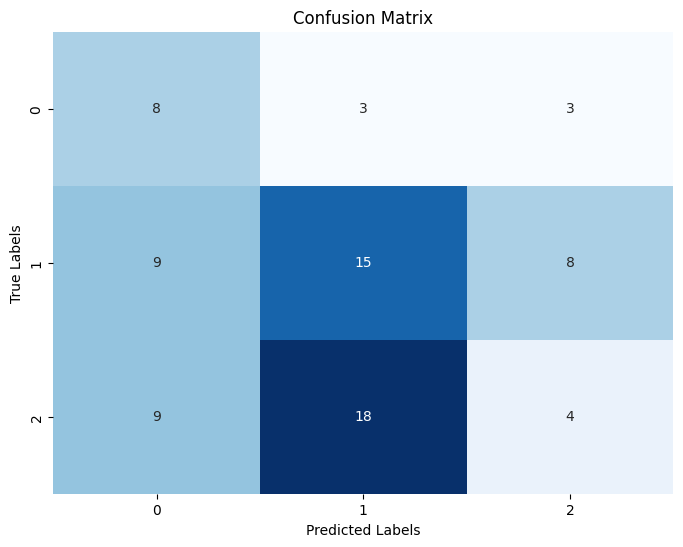

In [ ]:
# matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_gaussian)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Nuevamente, observamos malos resultados en la matriz de confusión. Notamos que la matriz de confusión del kernel lineal es mejor: esto se debe a que tomó el mejor resultado de cross validation, un valor atípico con precisión del 50%, los promedios siguen siendo más bajos que kernel gaussiano

#Ejercicio 4

# Métodos de ensamble: Random Forest
La combinación redundante y complementaria de clasificadores puede brindar una mejor clasificación y robustez comparado con un único clasificador. Veremos si un ensamble Random Forest tiene mejores resultados que un único clasificador.

Los parámetros a analizar son cantidad de estimadores y profundidad de cada árbol.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Especificamos el grid
param_grid = {'n_estimators':[15,20,30,40,50],
              'max_depth':[3,5,7,10,15,20,30]}

# Inicializamos la instancia del modelo
rf = RandomForestClassifier(class_weight={'Blue-Green': 1.724, "Bluish-Green": 1.041, "Green": 1.0})

# Scorer para determinar la métrica a mejorar
scorer = make_scorer(f1_score, average='weighted')

# GridSearchCV para cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_rf_classifier = grid_search.best_estimator_

# Predictions on the test set
y_pred_rf = best_rf_classifier.predict(X_test)

# Mejor costo encontrado
print(f"Mejor cantidad de estimadores: {grid_search.best_params_['n_estimators']}")
print(f"Mejor profundida máxima del árbol: {grid_search.best_params_['max_depth']}")
print("Resultados sobre el mejor costo")
# Evaluación
print(classification_report(y_test, y_pred_rf))


Mejor cantidad de estimadores: 15
Mejor profundida máxima del árbol: 20
Resultados sobre el mejor costo
              precision    recall  f1-score   support

  Blue-Green       0.25      0.21      0.23        14
Bluish-Green       0.46      0.59      0.52        32
       Green       0.58      0.45      0.51        31

    accuracy                           0.47        77
   macro avg       0.43      0.42      0.42        77
weighted avg       0.47      0.47      0.46        77



Notamos mejoras significativas respecto a los anteriores modelos. Antes de saltar a conclusiones, terminemos de hacer cross validation y ver la matriz de confusión

In [ ]:
#Métricas adicionales para cada pliegue
cv_predictions = cross_val_predict(best_svm_classifier, X_train, y_train, cv=5)
cv_metrics = precision_recall_fscore_support(y_train, cv_predictions, average='weighted')

#Resultados de la validación cruzada para cada pliegue
cross_val_f1 = cross_val_score(best_svm_classifier, X_train, y_train, cv=5, scoring=scorer)
print("Cross-Validation Results:")

for i, result in enumerate(cross_val_f1, 1):
    print(f"Fold {i}: {result * 100:.2f}%")

print("\nAverage Metrics Across Folds:")
print(f"Precision: {cv_metrics[0] * 100:.2f}%")
print(f"Recall: {cv_metrics[1] * 100:.2f}%")
print(f"F1 Score: {cv_metrics[2] * 100:.2f}%")


Cross-Validation Results:
Fold 1: 37.99%
Fold 2: 35.82%
Fold 3: 51.38%
Fold 4: 31.01%
Fold 5: 39.61%

Average Metrics Across Folds:
Precision: 39.75%
Recall: 39.55%
F1 Score: 39.50%


Como mencionamos anteriormente, antes teníamos problemas de robustez, el cross validation presentaba una alta varianza entre las métricas de cada fold. Ahora parece que este problema no está presente. Es probable que el uso de un método de ensamble haya sido el responsable de mitigar esta situación.

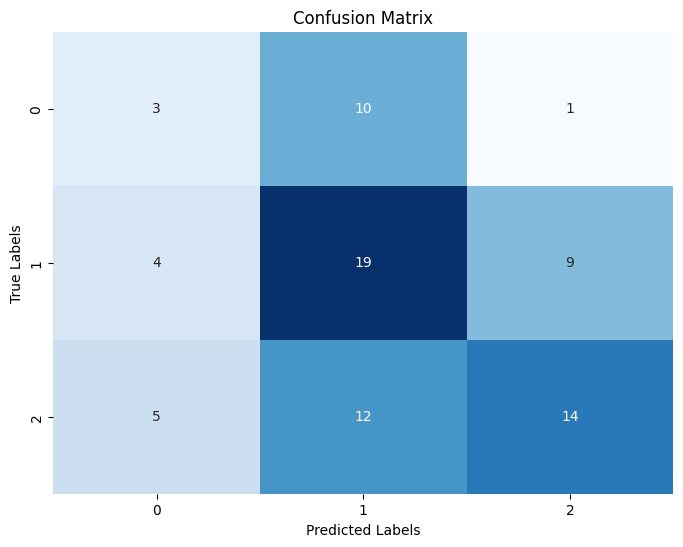

In [ ]:
# matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

A pesar de que no son buenos resultados, al menos ahora se puede presenciar cierta consistencia entre los true positives, esto es, una mejor precisión que los modelos anteriores

# Conclusiones:
Como hemos mencionado anteriormente, uno de los mayores problemas que nos encontramos en este trabajo fue el dataset: este era muy desbalanceado. Si se decidía no balancearlo, en todos los modelos hubieramos tenido problemas de overfitting y el objetivo del trabajo sería poco claro (¿qué sentido tiene obtener una precisión del 80% si las predicciones son todas de una sola clase?), por lo que aunque se pierdan muchos datos por el undersampling esta sigue siendo la opción más llamativa ya que nos permite una mejor interpretabilidad de los modelos.

Si bien la pérdida de datos ha deteriorado notablemente la capacidad de predicción de estos, mediante estas medidas pudimos observar el comportamiento de cada uno de estos modelos:
- SVM lineal: Con un costo alto, se pudo obtener un resultado óptimo no muy prometedor: bajas métricas y alta varianza en cross validation.
- SVM gaussian: Con un menor costo y un gamma relativamente alto (el default es 1/cant_parametros) se obtuvieron mejores métricas en el cross validation, aunque seguía presente el problema de la varianza.
- Random forest: Con 15 árboles de 5 de profundidad máxima cada uno, se obtuvo el mejor clasificador: en el ensamble tuvo mejores métricas y se solucionó el problema de la varianza en cross validation, algo probablemente generado por la robustez de un ensamble.

Cabe aclarar que las métricas mencionadas son teniendo en cuenta el cross validation, un fold del kernel lineal dió un f1-score del 50%, que es un valor atípico, lo que puede generar conclusiones equivocadas.